In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# funktion som plockar bort outliers ur datat

In [3]:
the_data = pd.read_csv('customerdata4.csv')
the_data.head()
#Visar de fem första raderna ur datat tillsammans med rubrukerna (features) 

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
the_data.describe()

#Visar en övergripande statistiskanalys av det kvantitativa datat i datasättet.
#Datasättet består av 200 rader.
#lägst ålder är 18år, högsta ålder är 70. Medelåldern är 38.85år, medianåldern är 36år
#lägst årsinkomst är 15k kr, högsta årsinkomst är 137k kr. Medelårsinkomst är 60.56k kr, medianårsinkomst är 61.5k kr
#lägst Spending Score är 1, högsta Spending Score är 99. MedelSpending Score är 50.2, medianSpending Score är 50

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


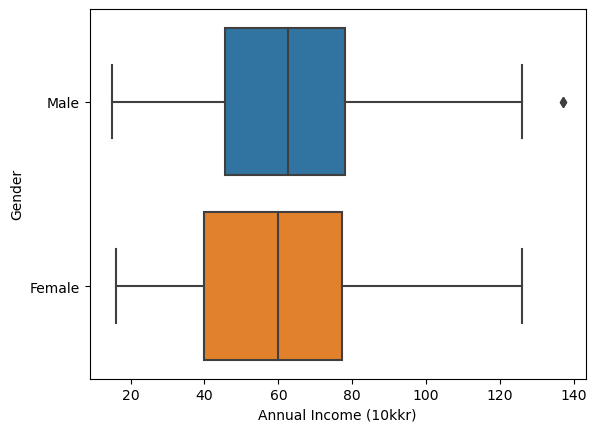

In [5]:

sns.boxplot(data=the_data, x="Annual Income (10kkr)", y="Gender")
plt.show()

# Här identifierar vi outliers i datasetet.

Min: Gender
Female    16.0
Male      15.0
Name: Annual Income (10kkr), dtype: float64

Max: Gender
Female    103.0
Male      101.0
Name: Annual Income (10kkr), dtype: float64


C:\Users\Victor.Blomkvist\AppData\Local\Temp\ipykernel_20952\2603521836.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_copy = data_copy.fillna(data_copy.median())


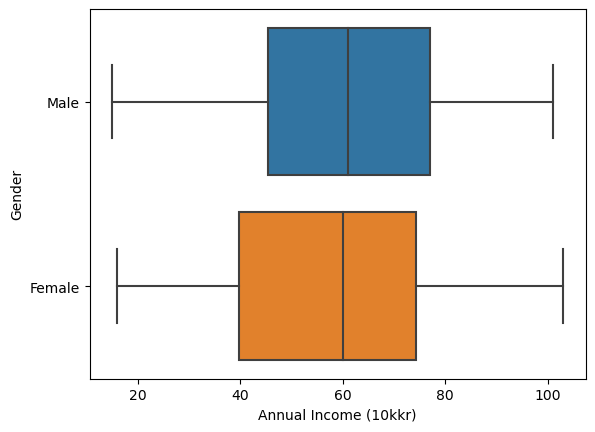

In [6]:
###

data_copy = copy.deepcopy(the_data)
data_copy["Annual Income (10kkr)"] = reject_outliers(data_copy["Annual Income (10kkr)"])

data_copy = data_copy.fillna(data_copy.median())

### Här tas outliers bort från datasetet och fyller på NAN-värden med medianen.

print(f"Min: {data_copy.groupby('Gender')['Annual Income (10kkr)'].min()}\n")
print(f"Max: {data_copy.groupby('Gender')['Annual Income (10kkr)'].max()}")
sns.boxplot(data=data_copy, x="Annual Income (10kkr)", y="Gender")
plt.show()

# Majoriteten av männen tjänar mer än majoriteten av kvinnorna. 
# Dock har den lägst betalda mannen lägre lön än den lägst betalda kvinnan. 
# Om man bortser från outlier:n så har den högst betalda kvinnan högre lön än den högst betalda mannen.

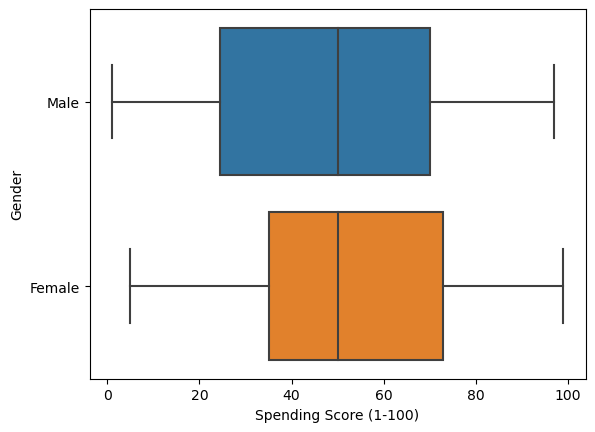

In [7]:
sns.boxplot(data=data_copy, x="Spending Score (1-100)", y="Gender")
plt.show()

# Kvinnor spenderar mer än män. Medianspenderaren bland både män och kvinnor spenderar dock lika mycket. 
# Vi ser att kvartilavståndet är större för män än för kvinnor vilket visar på att det finns en större variation
# i hur män spenderar jämfört mot kvinnor kring medianen.

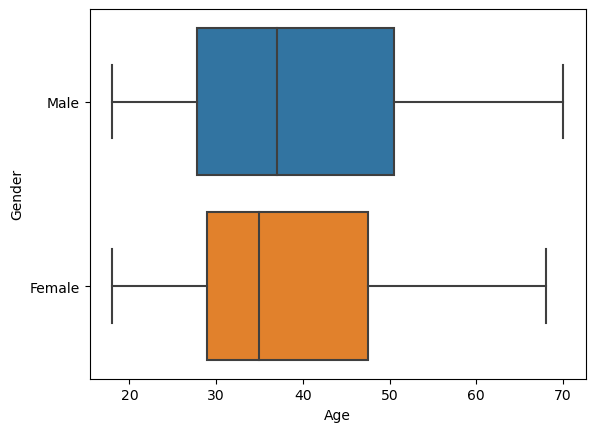

Min: Gender
Female    18
Male      18
Name: Age, dtype: int64

Max: Gender
Female    68
Male      70
Name: Age, dtype: int64


In [8]:
sns.boxplot(data=data_copy, x="Age", y="Gender")
plt.show()
print(f"Min: {(data_copy.groupby('Gender')['Age']).min()}\n")
print(f"Max: {(data_copy.groupby('Gender')['Age']).max()}")

# Både män och kvinnor har samma lägsta ålder: 18år. Medianmannen är dock äldre än mediankvinnan, 
# den äldsta mannen är äldre än den äldsta kvinnan.
# Vi ser att spridningen runt medianen är större hos män än hos kvinnor.

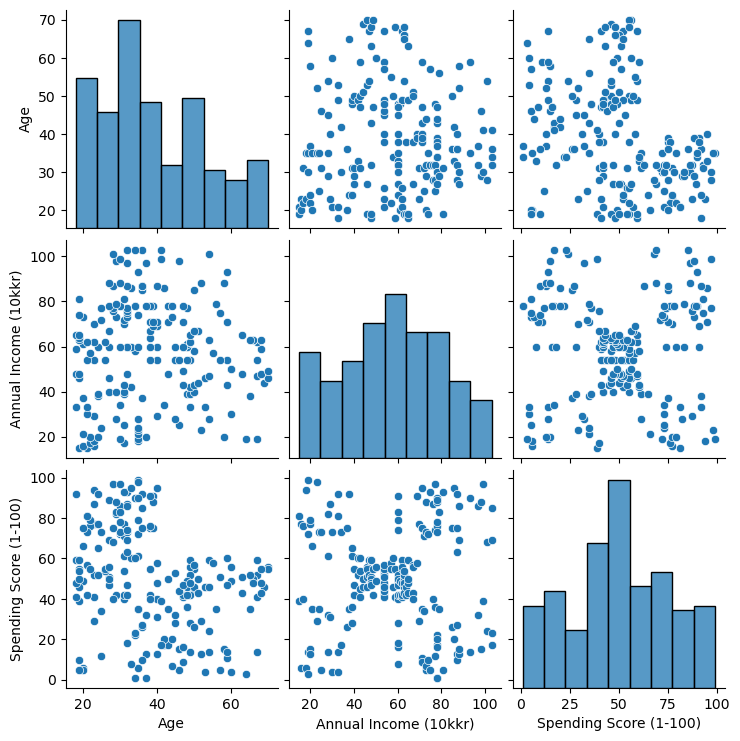

In [9]:
sns.pairplot(data=data_copy, vars=['Age','Annual Income (10kkr)','Spending Score (1-100)'])
plt.show()

#"annual income & spending score" och "age & spending score" ger tydligast uppdeling i kluster.

C:\Users\Victor.Blomkvist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared distance')

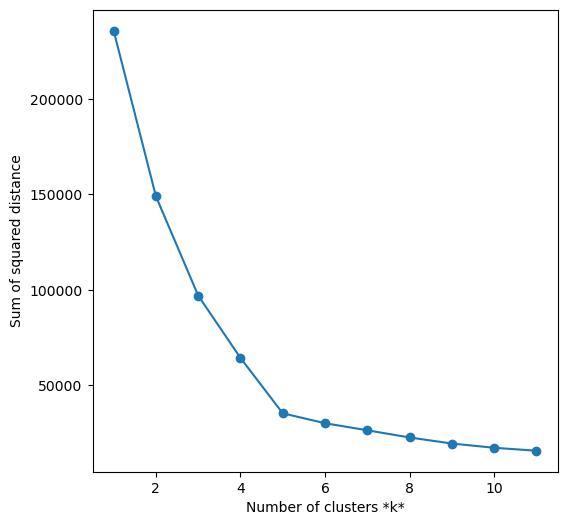

In [10]:
# Elbow test!

sse = []

X = data_copy[["Annual Income (10kkr)", "Spending Score (1-100)"]]

# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 12))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

# Ett Elbow-test görs för att bekräfta antalet kluster som bör användas vid K-means. = 5

[[54.6835443  49.74683544]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [79.97435897 82.12820513]
 [80.81081081 18.37837838]]


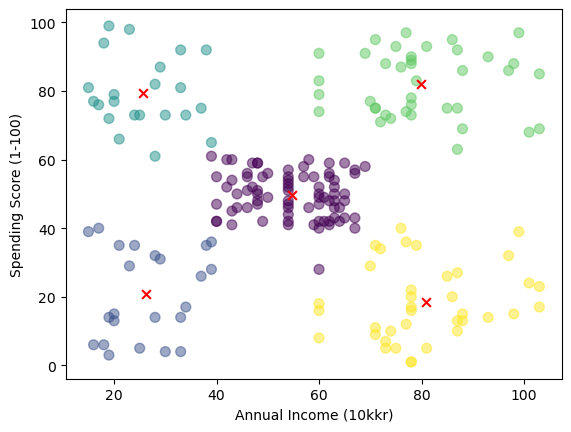

In [11]:
df_one = pd.DataFrame(data_copy,columns=['Annual Income (10kkr)','Spending Score (1-100)'])

k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(df_one)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_one['Annual Income (10kkr)'], df_one['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel('Annual Income (10kkr)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Det finns 5 tydliga grupper/kluster. Det finns inte något linjärt samband mellan årsinkomst och köpvilja.
# Det finns personer med låg inkomst som spenderar mycket,
# samtidigt som det finns personer med hög inkomst som spenderar lite och vice versa.
# De flesta värden hittar vi i mitten, dvs dem har en inkomst kring medianen och spending score kring medianen.
# Mellanmjölk helt enkelt.

C:\Users\Victor.Blomkvist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared distance')

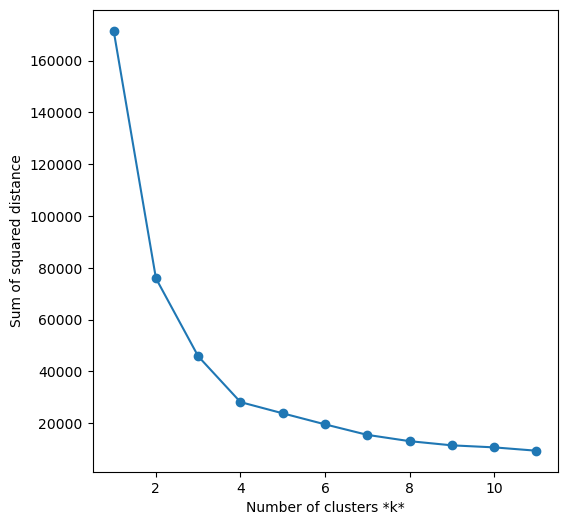

In [12]:
# Elbow test!

sse = []

X = data_copy[["Age", "Spending Score (1-100)"]]

# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 12))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

# Ett Elbow-test görs för att bekräfta antalet kluster som bör användas vid K-means. = 4

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


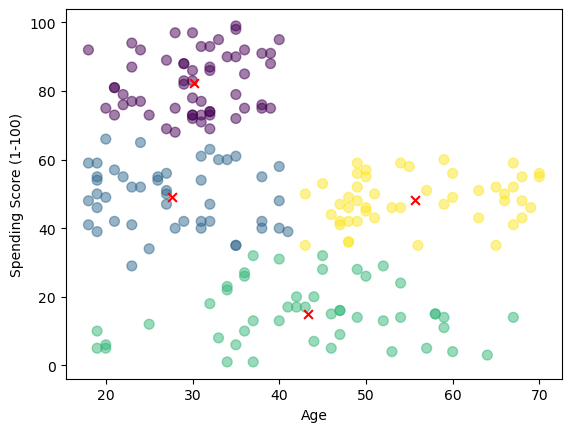

In [13]:
df_two = pd.DataFrame(data_copy,columns=['Age','Spending Score (1-100)'])

k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(df_two)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_two['Age'], df_two['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Vi kan med hjälp av k-means se att det finns 4 grupper när det kommer till spending score och ålder.
# Vi kan se att de personer som spenderar mest är ca 20-40 år gamla vilket är lägre än medianåldern i datasetet.
# Vi kan även se att när personerna fyllt 40 så avtar deras spending score avsevärt och stabiliserar sig runt medianen.
# Samtidigt ser vi att personer med en låg spending score finns i alla åldrar.